# Insurance Claims- Fraud Detection

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

# Importing requried Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
##Checking shape
df.shape

(1000, 40)

We have 1000 rows and 40 columns including target columns fraud_reported.

In [5]:
## Checking data types
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
## Our data set coantain ? , so we will replace it with null values.
df=df.replace('?',np.nan)

In [7]:
## Cheking null values
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [9]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [10]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [11]:
## We have repalce the collision type with the mode value
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
## We have replace the property damage info as no for nan values                                                  
df['property_damage']=df['property_damage'].replace(np.nan,'NO')
## We also repalce NO with nan values where police report had ? in our dataset.                                                 
df['police_report_available']=df['police_report_available'].replace(np.nan,'NO')

In [12]:
# we repalced _c39 because it all contain null values
df=df.drop(['_c39'],axis=1)

In [13]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<AxesSubplot:title={'center':'Heatmap of null values'}>

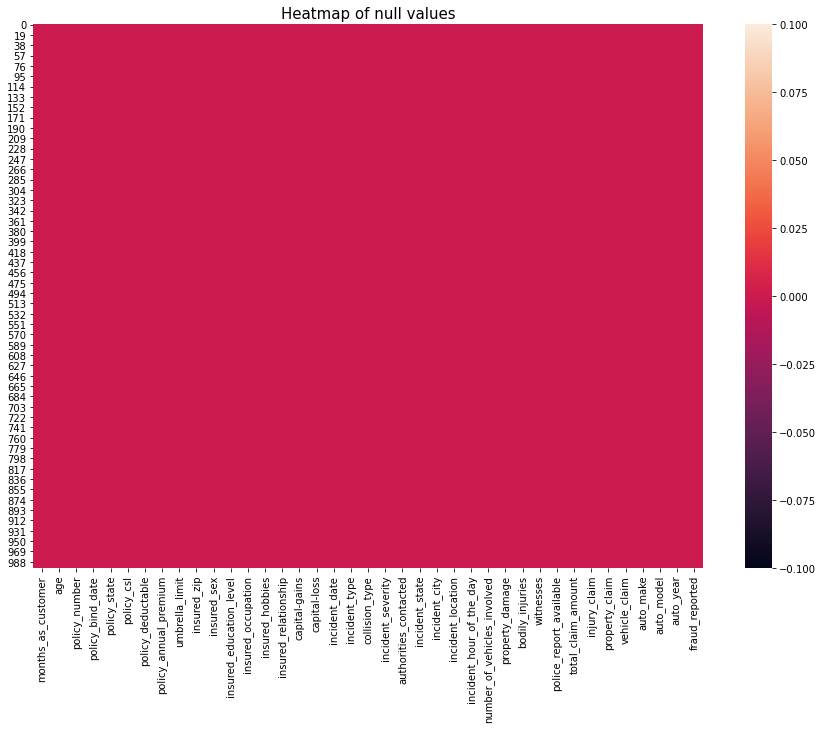

In [14]:
plt.figure(figsize=(15,10))
plt.title('Heatmap of null values',fontsize=15)
sns.heatmap(df.isnull())

we have fill & removed the null values, now our dataset has no null values.

In [15]:
## Checking unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [16]:
## Creating a new feature for vehicle age
df['vechicle_age']=2021-df['auto_year']

In [17]:
## let's delete unnecassary columns
df=df.drop(['policy_number','insured_zip','incident_location','auto_year','policy_bind_date','policy_state','incident_date'],axis=1)

In [18]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vechicle_age
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,17
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,Y,14
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,14
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,7
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,12


In [19]:
## Selecting object data type
do=df.select_dtypes(include='object')

In [20]:
for i in do:
    print('--------------',i,'---------------------------')
    print(do[i].value_counts())

-------------- policy_csl ---------------------------
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
-------------- insured_sex ---------------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
-------------- insured_education_level ---------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
-------------- insured_occupation ---------------------------
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
-------------- insured_hobbies ---------------------------
reading     

# Statistical Summary

In [21]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,vechicle_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,15.897000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,6.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,11.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,16.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,21.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,26.000000


Observation:

1-Policy_deductable,injury_claim,property_claim are right skewed because mean value is greater than median value.

2-Months_as_customer,umbrella_limit,capital_gains,injury_claim,property_claim contain zero as a miminum values.

3-Vehicle_claim,total_claim_amount,captial_gains are left skewed in nature.

# Data Visulization

<AxesSubplot:title={'center':'Fraud Value Counts'}, xlabel='fraud_reported', ylabel='count'>

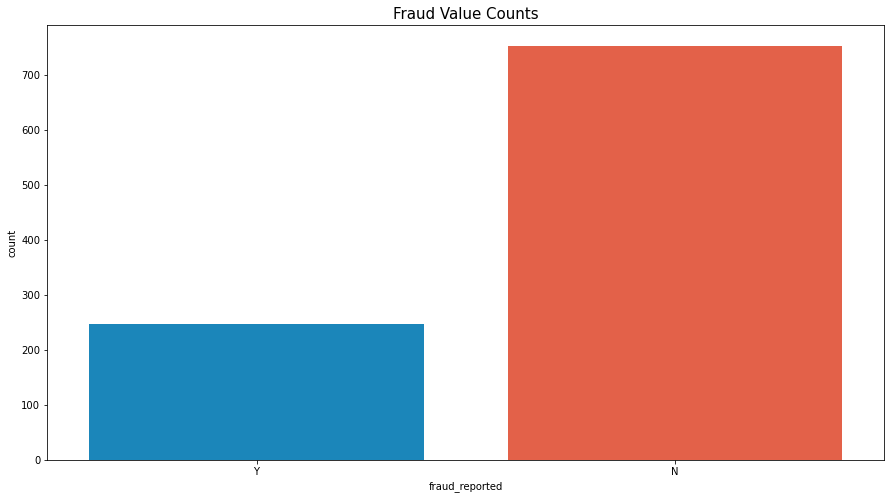

In [22]:
plt.figure(figsize=(15,8))
plt.title('Fraud Value Counts',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['fraud_reported'], data=df)

1-32 % insurance claims reported as Yes in our dataset and 68 % as No. 

In [23]:
def value_count(df,col):
    plt.figure(figsize=(15,8))
    plt.title(col+' ---no of counts',fontsize=15)
    plt.style.use('fivethirtyeight')
    sns.countplot(df[col], data=df)

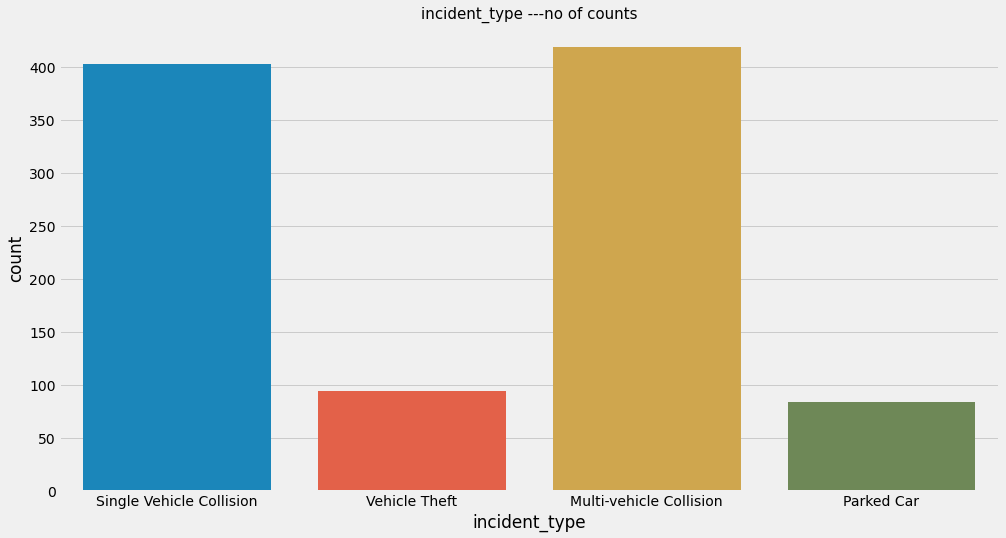

In [24]:
value_count(df,'incident_type')

observation:
1-In accident type, Multi vehicle collision is major issue.

2- Majority of insurance claimed for accidental vehicle. fer for theft vehicle.

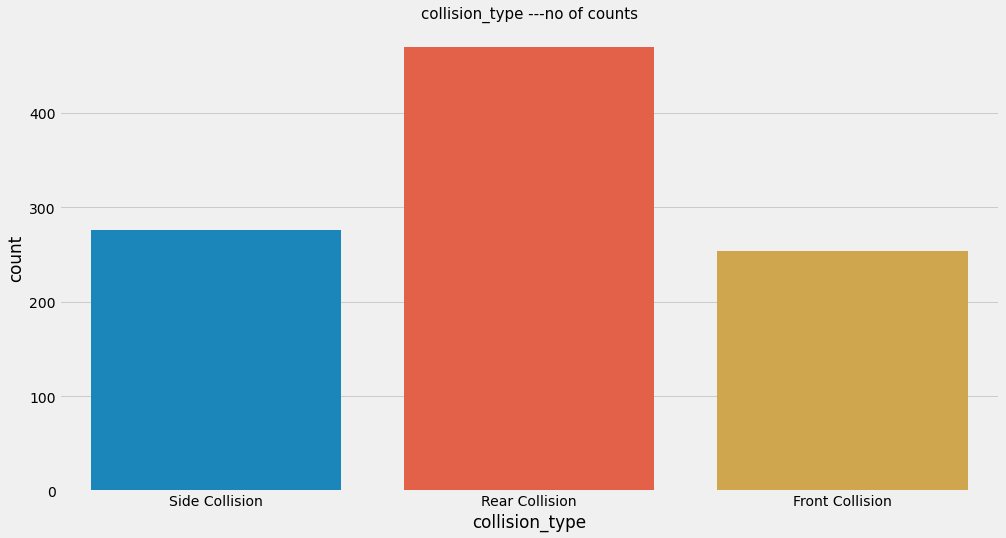

In [25]:
value_count(df,'collision_type')

1-for most of vehcile, the type of collision is Rear Collision.

2-Side collision & Front Collission are apporimatly same (250-260) in our dataset.

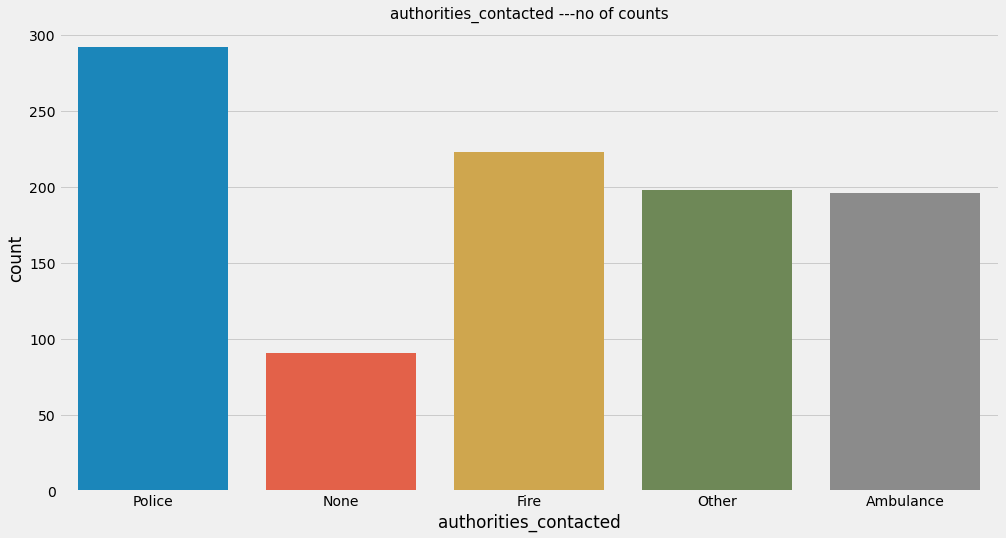

In [26]:
value_count(df,'authorities_contacted')

1-In most of cases, vehicle owner called to police first.

2-Fire after the collision may be a 2nd prime reason.

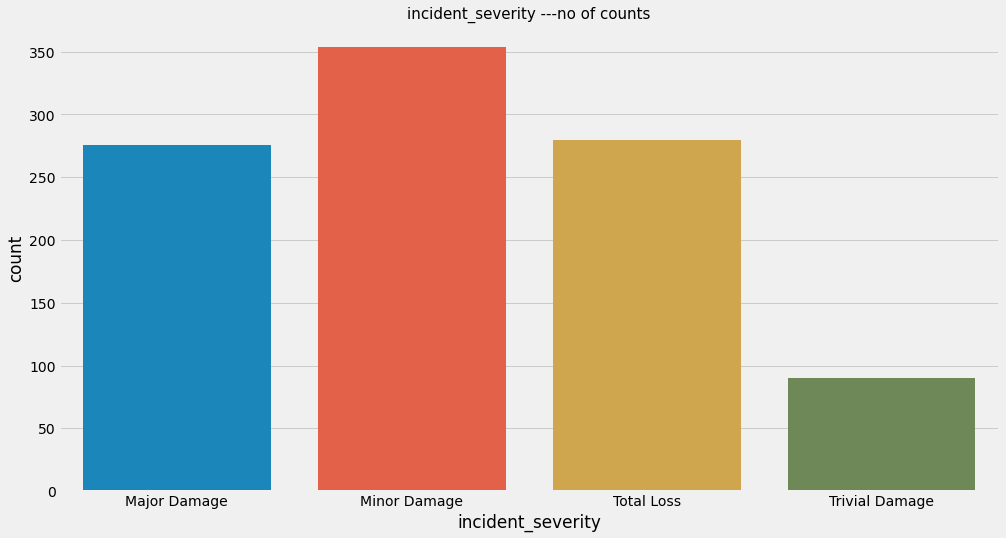

In [27]:
value_count(df,'incident_severity')

1-In most of insurance claim, the damage to vehicle is minor in nature.

2- Major damage vehicles are 280 in our dataset. 

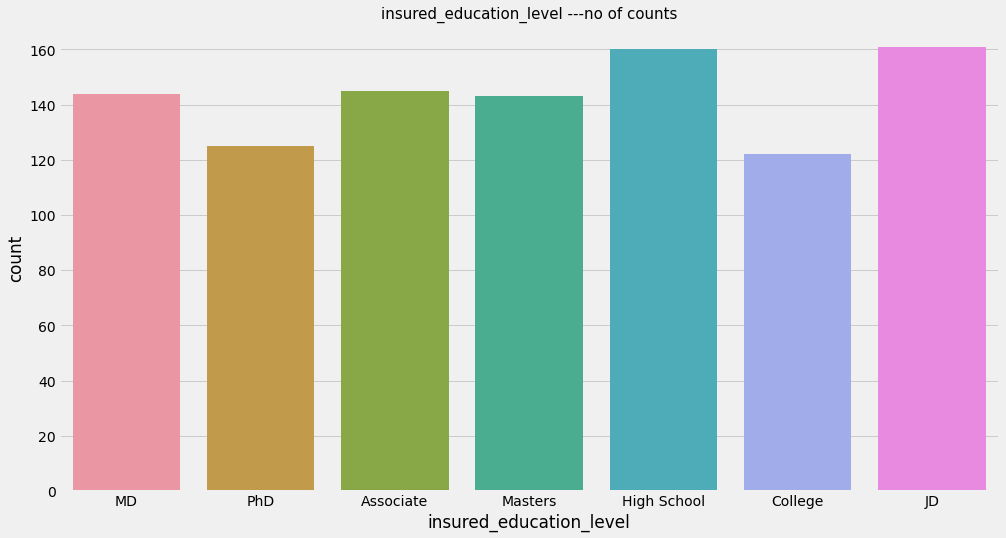

In [28]:
# # Breakdown of Average Vehicle claim by insured's education level, grouped by fraud reported
value_count(df,'insured_education_level')

Highscool passout and doctor of law are the major persons who claimed for Insurance in our dataset.

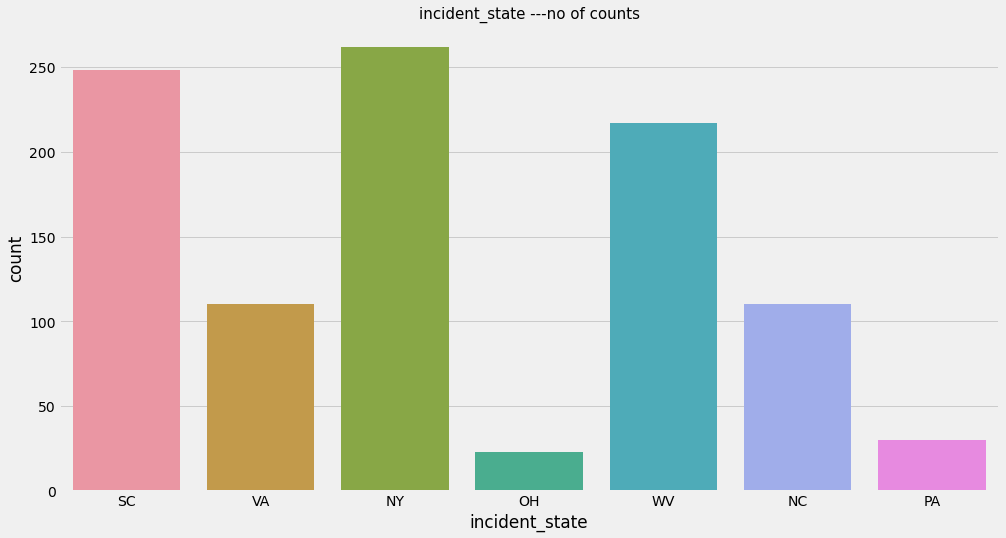

In [29]:
value_count(df,'incident_state')

Majority of accident spotted in NY followed by SC in USA.

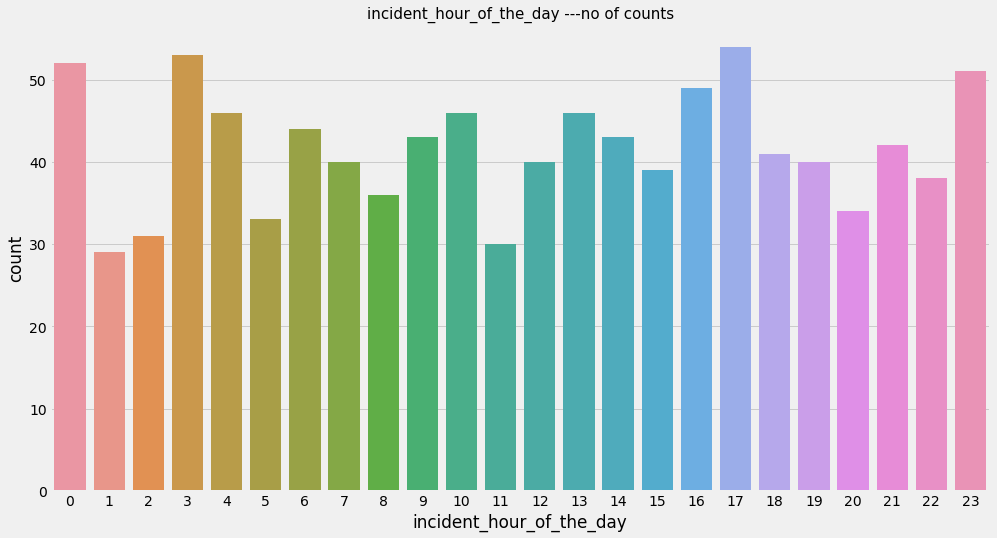

In [30]:
value_count(df,'incident_hour_of_the_day')

We can see that in midnight and in afternoon 12pm-5pm the chances of accidents are high.

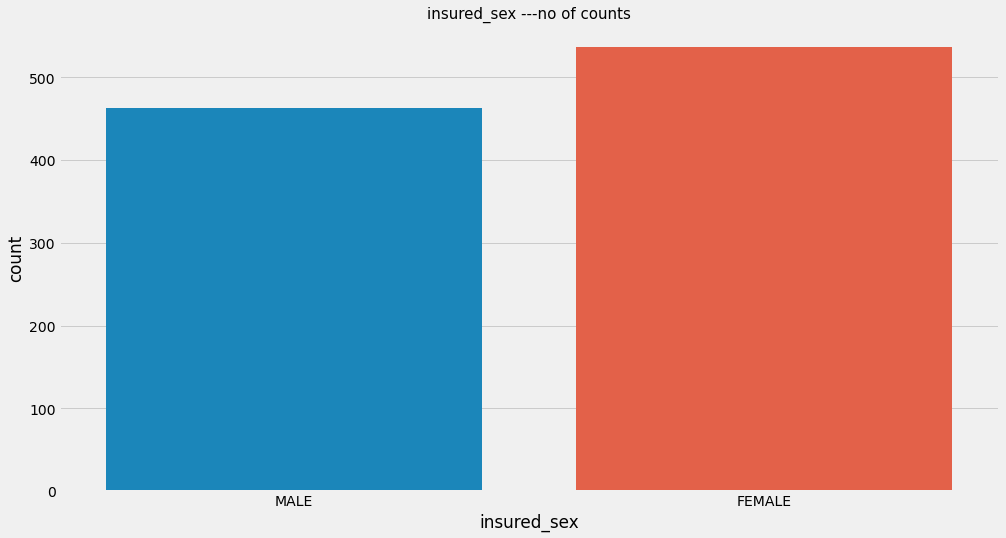

In [31]:
value_count(df,'insured_sex')

In our dataset, Females claims more than men for vehicle insurance.

Visualization with target

<AxesSubplot:title={'center':'Collision type Vs Fraud Reported'}, xlabel='collision_type', ylabel='count'>

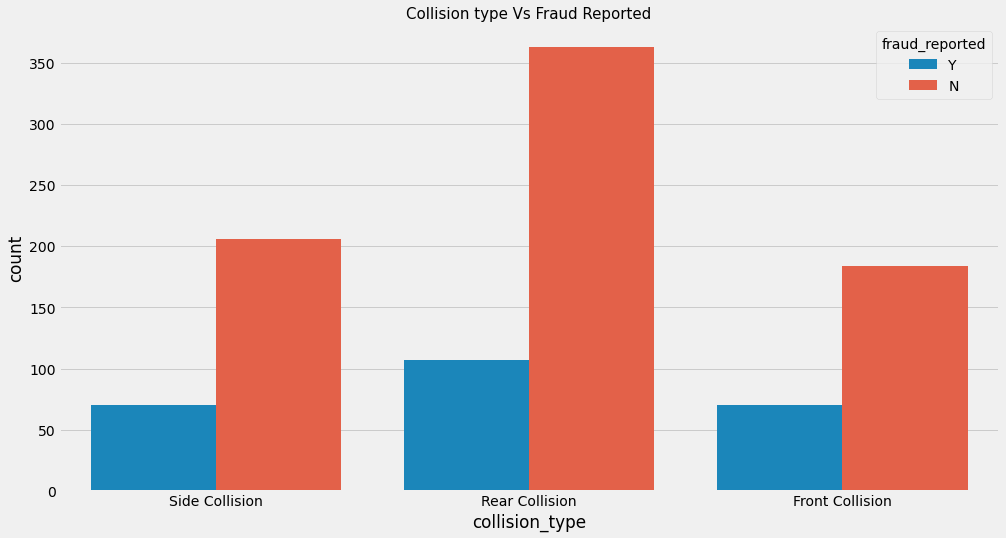

In [32]:
plt.figure(figsize=(15,8))
plt.title('Collision type Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['collision_type'],hue='fraud_reported',data=df)

We could see that in rear collision most genuine appicant claime for insurance cover. There is lease froud reported in case of Rear collision

<AxesSubplot:title={'center':'incident_severity Vs Fraud Reported'}, xlabel='incident_severity', ylabel='count'>

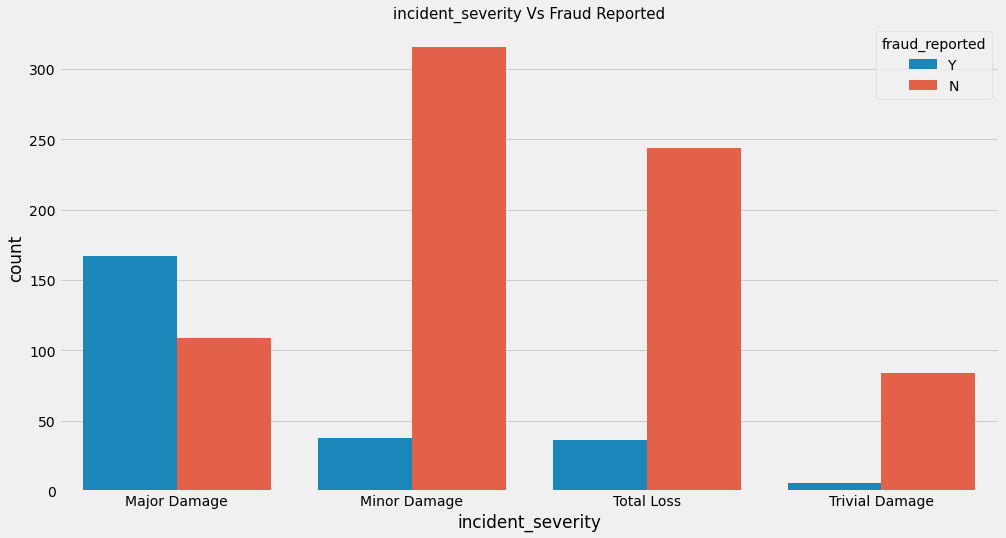

In [33]:
plt.figure(figsize=(15,8))
plt.title('incident_severity Vs Fraud Reported',fontsize=15)
plt.style.use('fivethirtyeight')
sns.countplot(df['incident_severity'],hue='fraud_reported',data=df)

1-In mAjor damage case most of Fraud insurance claims reported.

2-In minor case we could see very least cases reported to froud as compared to number of cases reported of minor damage.

3- In trivial damage, lowest fraud reported.

<AxesSubplot:title={'center':'insured_relationship Vs Fraud Reported'}, xlabel='insured_relationship', ylabel='count'>

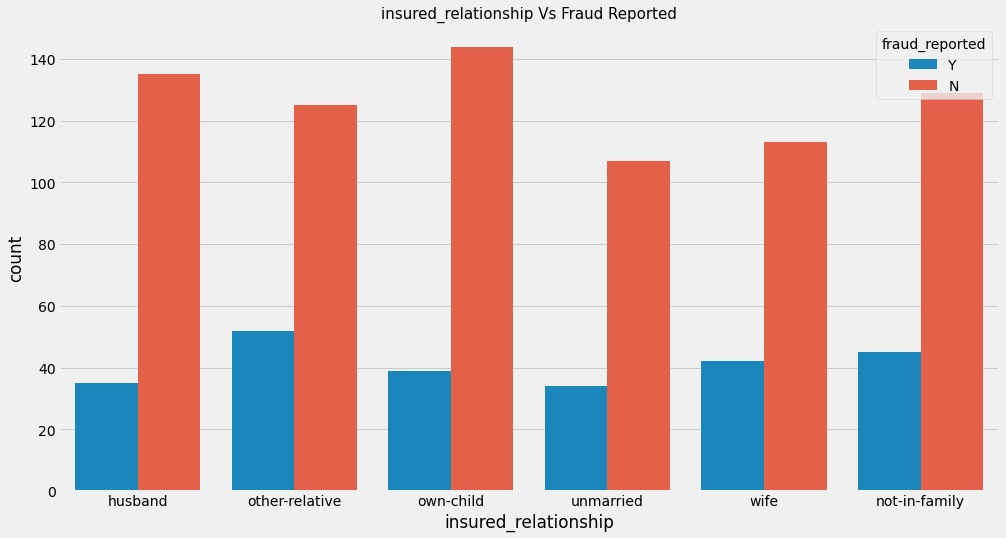

In [34]:
plt.figure(figsize=(15,8))
plt.title('insured_relationship Vs Fraud Reported',fontsize=15)
sns.countplot(df['insured_relationship'],hue='fraud_reported',data=df)

Here we can't find any observation from our data.

# Distribution Plot

In [35]:
df_n=df.select_dtypes(exclude='object')

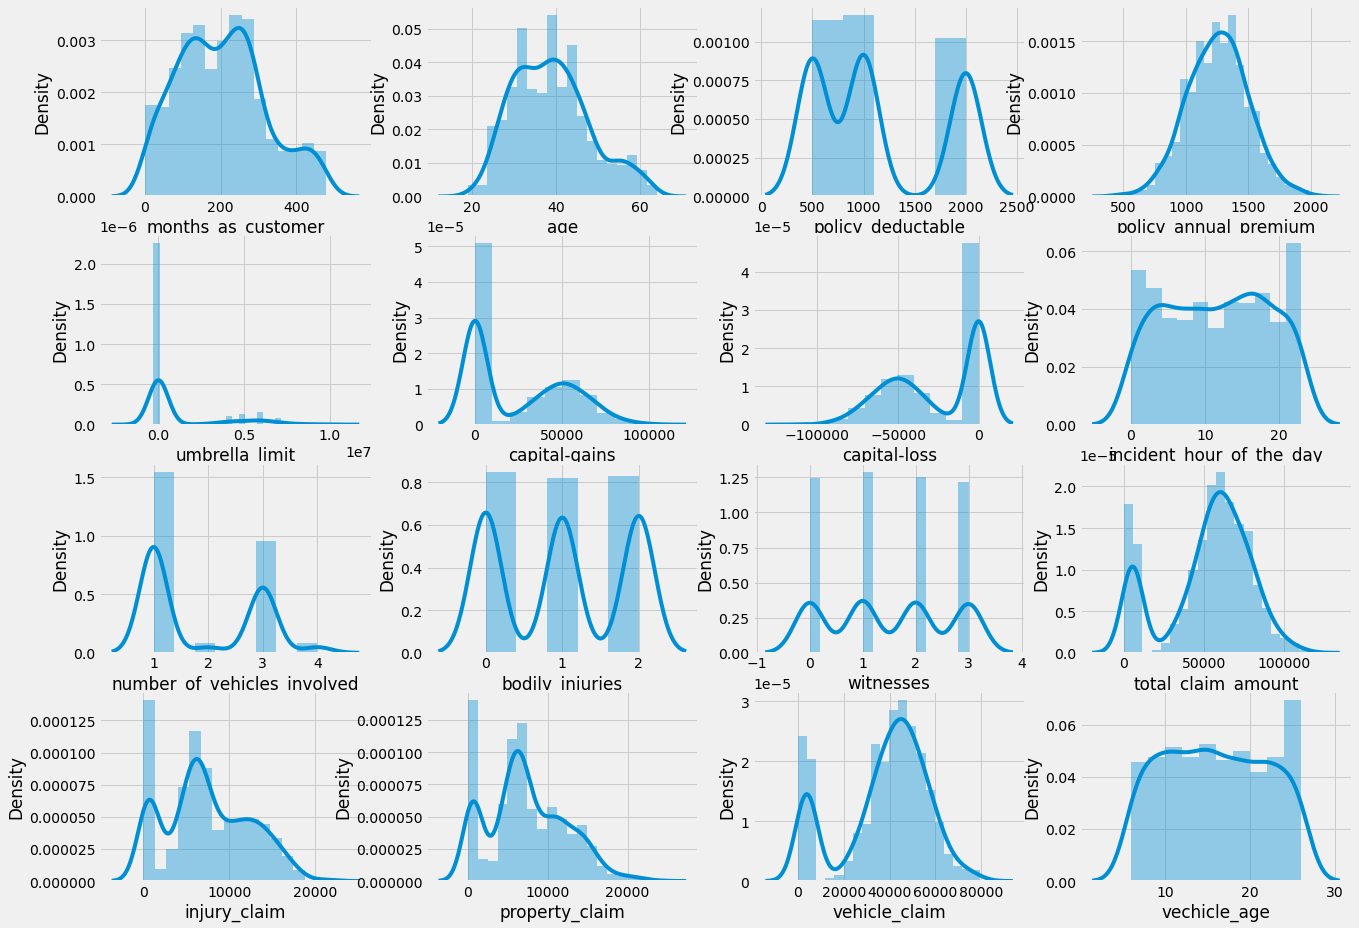

In [36]:
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.distplot(df[i])
        plot=plot+1
      

# Outliers

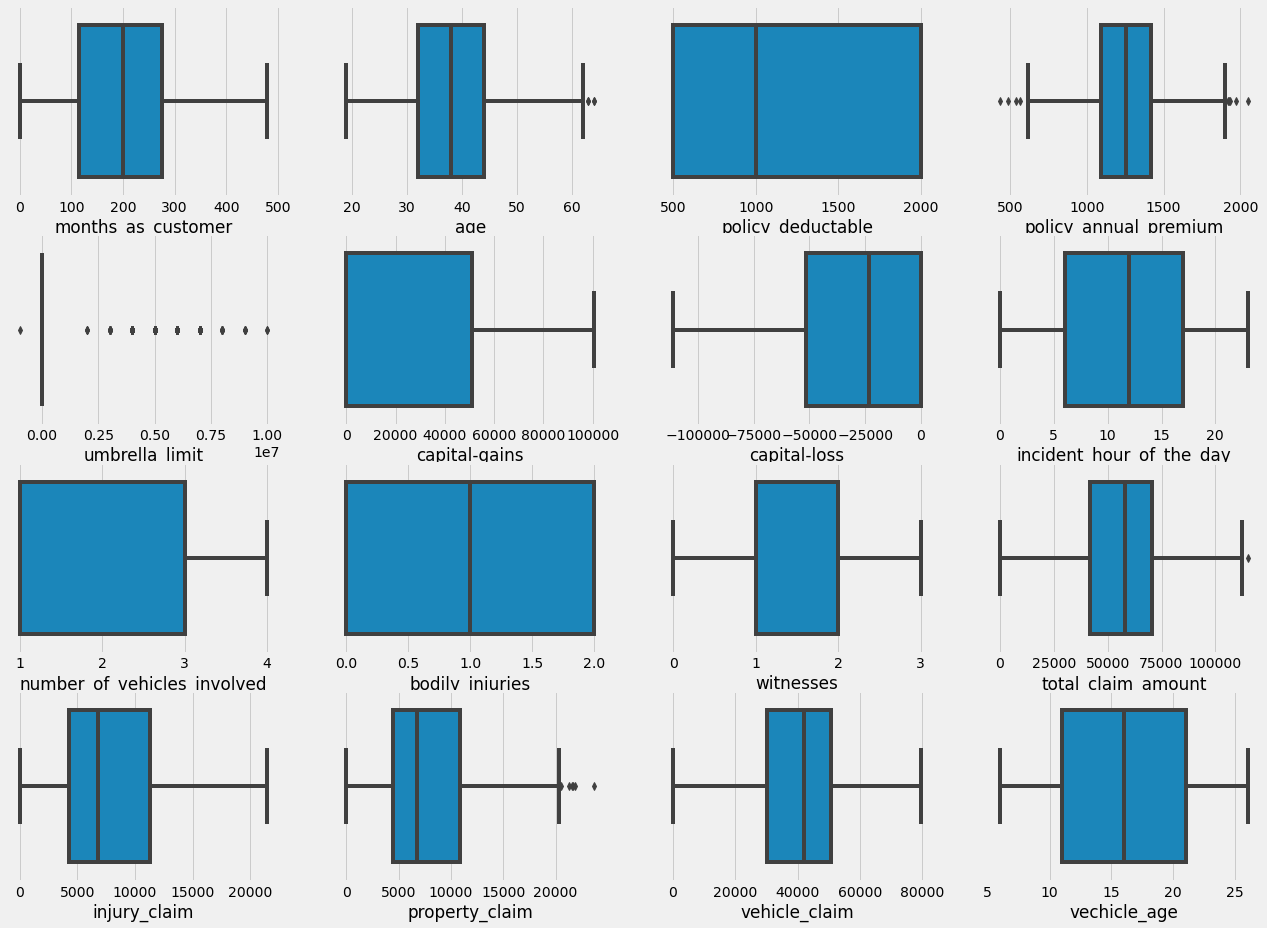

In [37]:
plt.figure(figsize=(20,15))
plot=1
for i in df_n:
    if plot<=16:
        plt.subplot(4,4,plot)
        sns.boxplot(df[i])
        plot=plot+1

We have no very far outliers which can impact on our prediction. So we will use it as it is.

# Skewness

In [38]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
vechicle_age                   0.048289
dtype: float64

Our skewness in alomost okk

# Label Encoder

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in do:
    df[i]=le.fit_transform(df[i])
    

In [42]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vechicle_age
0,328,48,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,17
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,1,14
2,134,29,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,14
3,256,41,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,7
4,228,44,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,12


# Correlation

In [43]:
df.corr()['fraud_reported']

months_as_customer             0.020544
age                            0.012143
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.058622
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_type                 -0.050376
collision_type                -0.017315
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839
property_damage                0.017202
bodily_injuries                0.033877
witnesses                      0.049497
police_report_available       -0.027768


<AxesSubplot:title={'center':'Correlation with fraud_reported'}>

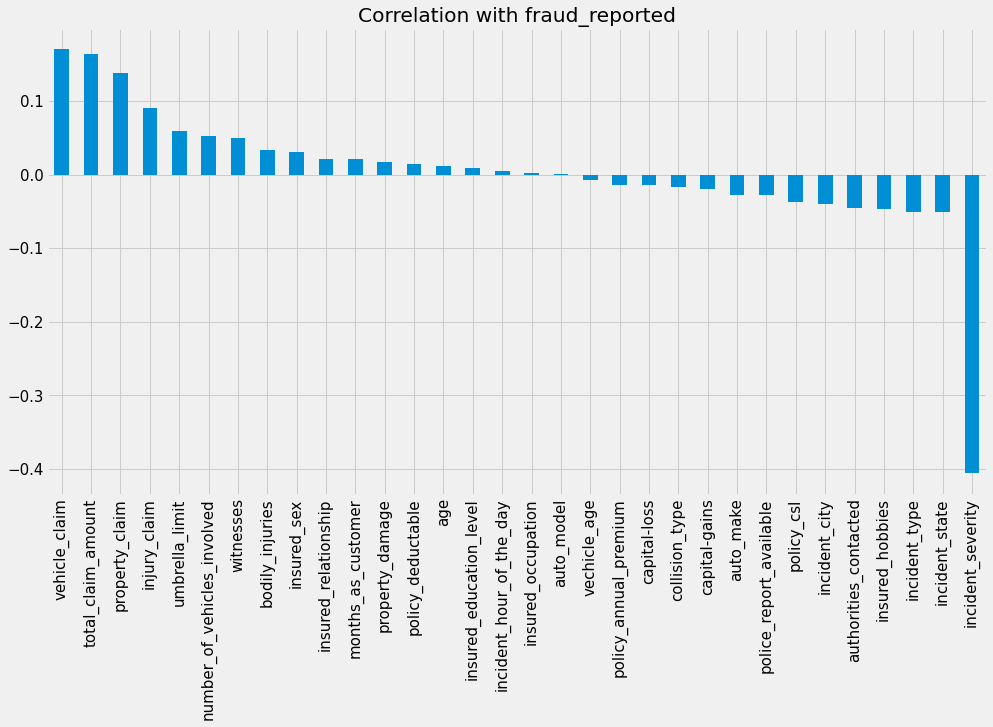

In [45]:
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot.bar(figsize=(15,8),grid=True,title='Correlation with fraud_reported',fontsize=15)

1- Incident Severity is highly negatively correlated with our target Attribute.

2- Neither there is a very strong nor very weak correlation exist with target attribute.

3-Auto model, insured occupation has approx zero correlation with our target attribute

<AxesSubplot:>

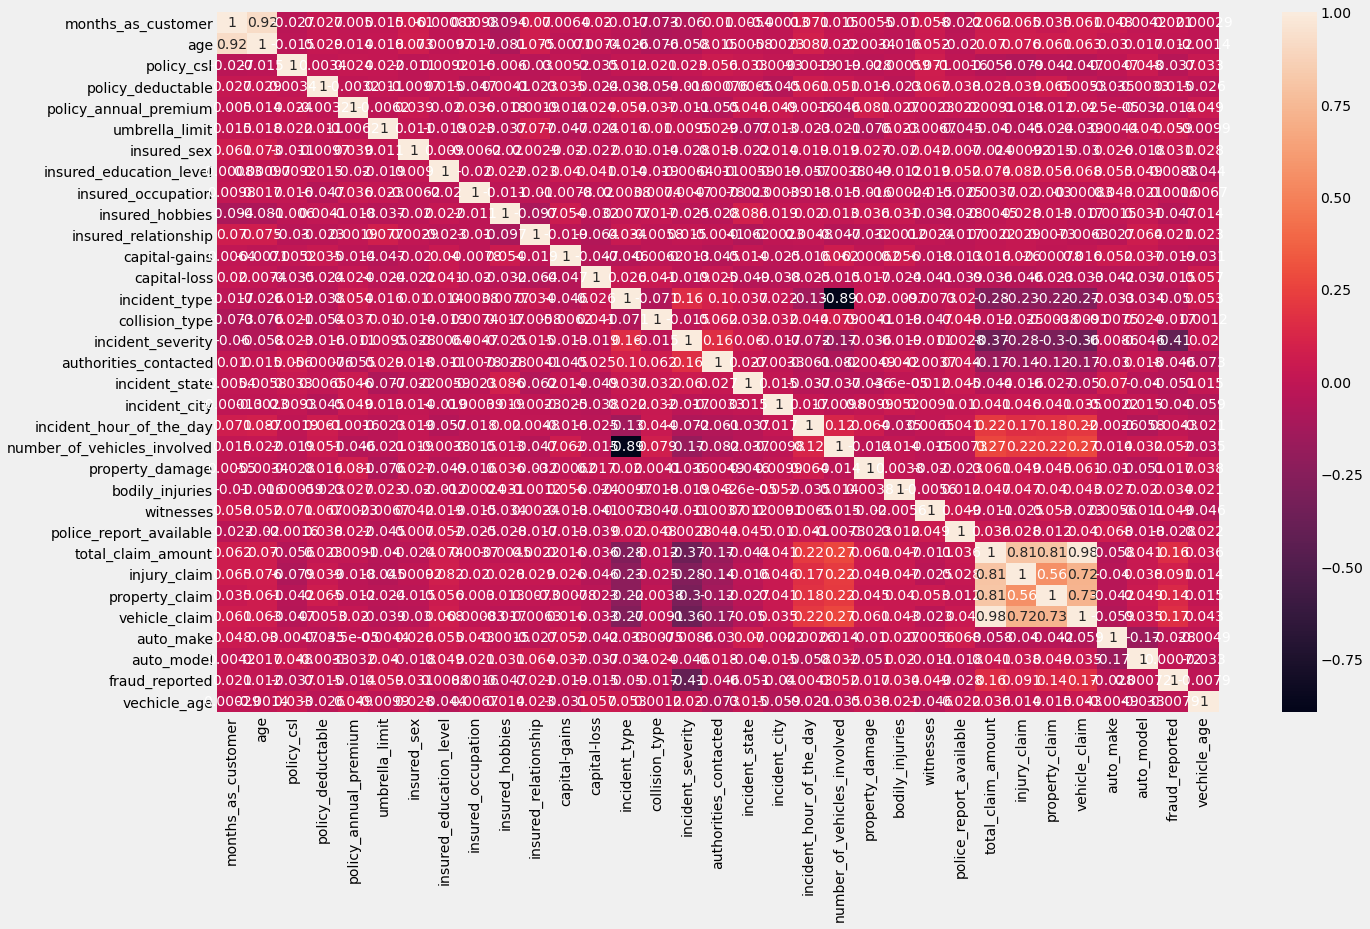

In [46]:
## Correlation Heatmap
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

# Split the data in X and Y

In [49]:
x=df.drop(['fraud_reported'],axis=1)
y=df[['fraud_reported']]


In [50]:
x

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,328,48,1,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,17
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,14
2,134,29,0,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,14
3,256,41,1,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,7
4,228,44,2,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,4,0,0,2,0,1,1,0,4,20,1,1,0,1,0,87200,17440,8720,61040,6,6,15
996,285,41,0,1000,1436.79,0,0,6,9,17,5,70900,0,2,1,0,1,4,3,23,1,1,2,3,0,108480,18080,18080,72320,13,28,6
997,130,34,1,500,1383.49,3000000,0,5,1,3,2,35100,0,0,2,1,4,0,0,4,3,0,2,3,1,67500,7500,7500,52500,11,19,25
998,458,62,2,2000,1356.92,5000000,1,0,5,0,5,0,0,2,1,0,3,1,0,2,1,0,0,1,1,46980,5220,5220,36540,1,5,23


In [51]:
y

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


# standard Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,vechicle_age
0,1.078140,0.990836,0.060937,-0.222383,0.616705,-0.479476,1.076953,0.530931,-1.158316,1.281737,-1.437957,1.011331,0.953851,0.766005,1.344000,-1.260614,1.196963,0.351762,-0.962196,-0.956261,-0.823865,1.520282,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,0.183440
1,0.208995,0.334073,0.060937,1.412784,-0.242521,1.697980,1.076953,0.530931,-0.162558,0.929078,-0.247595,-0.901927,0.953851,1.691132,-0.030233,-0.195906,1.196963,0.815829,0.995476,-0.524475,-0.823865,-0.657773,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,-0.315491
2,-0.608002,-1.088913,-1.182668,1.412784,0.642233,1.697980,-0.928546,1.557877,1.082141,-1.363201,0.347586,0.358023,0.953851,-1.084249,-0.030233,-0.195906,1.196963,-1.040437,-0.962196,-0.668404,1.140056,-0.657773,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,-0.315491
3,0.452355,0.224613,0.060937,1.412784,0.652886,2.133471,-0.928546,1.557877,-1.407256,-1.363201,0.942766,0.853388,-1.267577,0.766005,-1.404466,-1.260614,1.196963,-0.576371,-1.451614,-0.956261,-0.823865,-0.657773,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,-1.479664
4,0.208995,0.552994,1.304542,-0.222383,1.341980,2.133471,1.076953,-1.522961,1.082141,-1.363201,0.942766,1.467210,-0.683741,1.691132,-0.030233,-0.195906,-0.109052,-1.040437,-1.451614,1.202666,-0.823865,-0.657773,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,-0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.304542,-0.222383,0.222884,-0.479476,-0.928546,1.044404,-1.158316,0.576420,0.942766,-0.901927,0.953851,0.766005,-1.404466,-0.195906,-0.762060,-1.504504,0.506058,1.202666,-0.823865,1.520282,-1.210174,-0.438431,-0.676554,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,-0.149180
996,0.704407,0.224613,-1.182668,-0.222383,0.739141,-0.479476,-0.928546,1.557877,0.584261,1.281737,1.537947,1.643100,0.953851,0.766005,-0.030233,-1.260614,-0.762060,0.351762,0.016640,1.634452,-0.823865,1.520282,1.229693,1.362107,-0.676554,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,-1.645974
997,-0.642767,-0.541611,0.060937,-1.039966,0.520739,0.826998,-0.928546,1.044404,-1.407256,-1.186872,-0.247595,0.358023,0.953851,-1.084249,1.344000,-0.195906,1.196963,-1.504504,-1.451614,-1.100189,1.140056,-0.657773,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,1.513924
998,2.208028,2.523284,1.304542,1.412784,0.411866,1.697980,1.076953,-1.522961,-0.411497,-1.715859,1.537947,-0.901927,0.953851,0.766005,-0.030233,-1.260614,0.543955,-1.040437,-1.451614,-1.388046,-0.823865,-0.657773,-1.210174,-0.438431,1.478078,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,1.181303


# Feature Importance

In [53]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [54]:
print(extra.feature_importances_)

[0.02845028 0.02866695 0.02408323 0.0244835  0.03037729 0.02081359
 0.01791931 0.02639543 0.03171525 0.03997981 0.02633626 0.02479731
 0.026457   0.01759048 0.02094117 0.18421084 0.02690171 0.03041572
 0.02734267 0.02823425 0.01681837 0.01887014 0.02333645 0.02569148
 0.016719   0.03213386 0.02968677 0.03273195 0.03130618 0.03025385
 0.02666737 0.02967252]


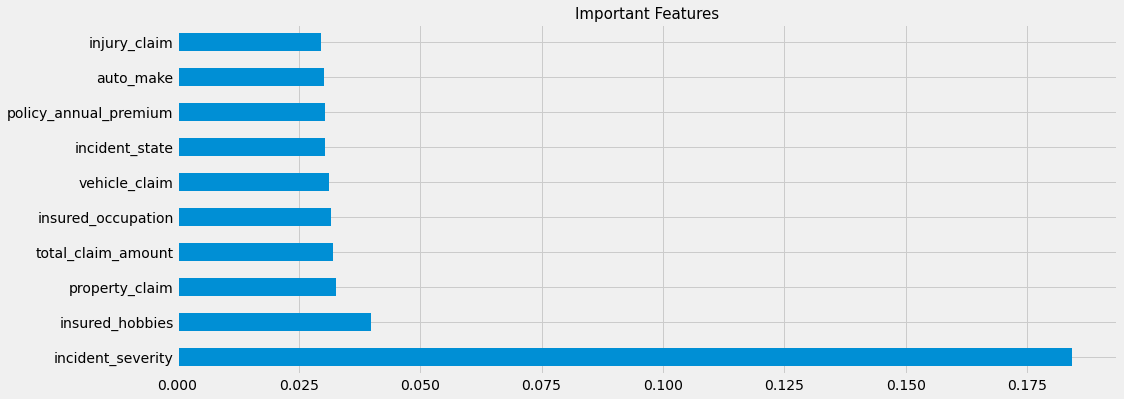

In [55]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

1-We could see incident severity is most important feature in our dataset to predict the claim.


# Model Building

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.combine import SMOTEENN

In [69]:
 ##over sampling of our Data
sm=SMOTEENN()
x_resample,y_resample=sm.fit_resample(x,y)

In [70]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=.20,random_state=i,stratify=y_resample)
        
       # print(x_train.shape,y_train.shape) 
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('F1 score',f1_score(y_test,pred))
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r

max accuracy score corresponding to 59 is 0.9122807017543859


cross validation score 0.7739999999999999


Standard Deviation 0.028705400188814675


F1 score 0.9352517985611511


Training accuracy 0.8867647058823529


Test Accuracy 0.8947368421052632


Confusion Matrix [[ 23  14]
 [  4 130]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.62      0.72        37
           1       0.90      0.97      0.94       134

    accuracy                           0.89       171
   macro avg       0.88      0.80      0.83       171
weighted avg       0.89      0.89      0.89       171



Roc_auc Score 0.7958854376764825





59

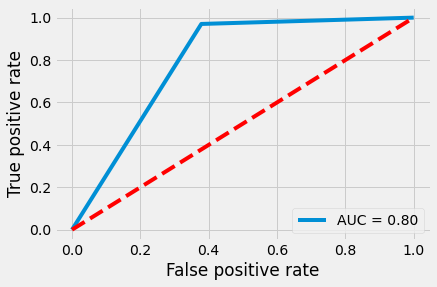

In [71]:
lr=LogisticRegression()
max_accuracy_score(lr,x,y)

max accuracy score corresponding to 62 is 0.9766081871345029


cross validation score 0.773


Standard Deviation 0.02059126028197402


F1 score 0.9545454545454547


Training accuracy 1.0


Test Accuracy 0.9298245614035088


Confusion Matrix [[ 33   4]
 [  8 126]]


Classification Report               precision    recall  f1-score   support

           0       0.80      0.89      0.85        37
           1       0.97      0.94      0.95       134

    accuracy                           0.93       171
   macro avg       0.89      0.92      0.90       171
weighted avg       0.93      0.93      0.93       171



Roc_auc Score 0.9160951996772893





62

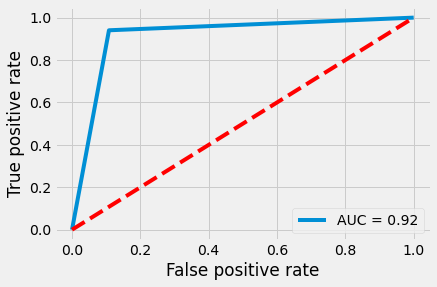

In [72]:
## DEcision Tree
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

max accuracy score corresponding to 49 is 0.9064327485380117


cross validation score 0.7169999999999999


Standard Deviation 0.025416530054277648


F1 score 0.9305555555555556


Training accuracy 0.925


Test Accuracy 0.8830409356725146


Confusion Matrix [[ 17  20]
 [  0 134]]


Classification Report               precision    recall  f1-score   support

           0       1.00      0.46      0.63        37
           1       0.87      1.00      0.93       134

    accuracy                           0.88       171
   macro avg       0.94      0.73      0.78       171
weighted avg       0.90      0.88      0.87       171



Roc_auc Score 0.7297297297297297





49

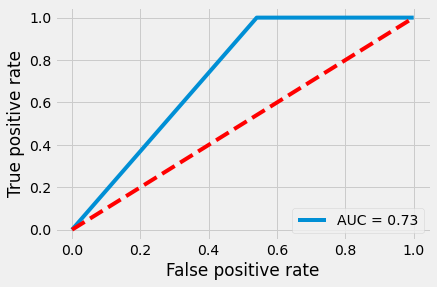

In [73]:
## KNn
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

max accuracy score corresponding to 99 is 0.9005847953216374


cross validation score 0.7209999999999999


Standard Deviation 0.047999999999999994


F1 score 0.9377289377289377


Training accuracy 0.8455882352941176


Test Accuracy 0.9005847953216374


Confusion Matrix [[ 26  11]
 [  6 128]]


Classification Report               precision    recall  f1-score   support

           0       0.81      0.70      0.75        37
           1       0.92      0.96      0.94       134

    accuracy                           0.90       171
   macro avg       0.87      0.83      0.85       171
weighted avg       0.90      0.90      0.90       171



Roc_auc Score 0.8289632916498588





99

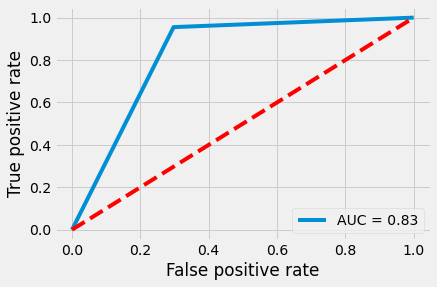

In [74]:
##Naive Bayes
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

max accuracy score corresponding to 67 is 0.9766081871345029


cross validation score 0.772


Standard Deviation 0.02731300056749535


F1 score 0.9446494464944649


Training accuracy 1.0


Test Accuracy 0.9122807017543859


Confusion Matrix [[ 28   9]
 [  6 128]]


Classification Report               precision    recall  f1-score   support

           0       0.82      0.76      0.79        37
           1       0.93      0.96      0.94       134

    accuracy                           0.91       171
   macro avg       0.88      0.86      0.87       171
weighted avg       0.91      0.91      0.91       171



Roc_auc Score 0.8559903186768859





67

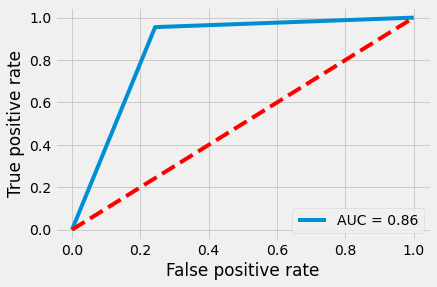

In [75]:
#Random forest
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

max accuracy score corresponding to 44 is 0.9824561403508771


cross validation score 0.797


Standard Deviation 0.034146742157927734


F1 score 0.9699248120300752


Training accuracy 0.9882352941176471


Test Accuracy 0.9532163742690059


Confusion Matrix [[ 34   3]
 [  5 129]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.92      0.89        37
           1       0.98      0.96      0.97       134

    accuracy                           0.95       171
   macro avg       0.92      0.94      0.93       171
weighted avg       0.95      0.95      0.95       171



Roc_auc Score 0.940802743041549





44

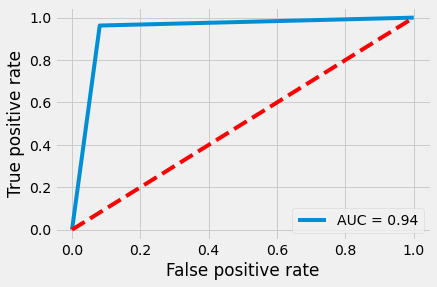

In [76]:
## adaboost
Adb=AdaBoostClassifier()
max_accuracy_score(Adb,x,y)

max accuracy score corresponding to 44 is 0.9824561403508771


cross validation score 0.819


Standard Deviation 0.025768197453450225


F1 score 0.9662921348314607


Training accuracy 1.0


Test Accuracy 0.9473684210526315


Confusion Matrix [[ 33   4]
 [  5 129]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.89      0.88        37
           1       0.97      0.96      0.97       134

    accuracy                           0.95       171
   macro avg       0.92      0.93      0.92       171
weighted avg       0.95      0.95      0.95       171



Roc_auc Score 0.9272892295280355





44

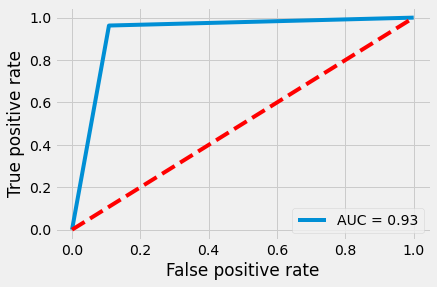

In [77]:
## Gardient Boost
gb=GradientBoostingClassifier()
max_accuracy_score(gb,x,y)

In [85]:
accuracy_score1=[91.22,97.66,90.64,90.05,97.66,98.24,98.24]
cross_val=[77.39,77.3,71.69,72.09,77.2,79.7,81.9]
f_1=[93.52,95.45,93.055,93.77,94.46,96.99,96.62]
model=['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier']

best_model=pd.DataFrame({'Model_name':model,'Accuracy':accuracy_score1,'Cross_validation':cross_val,'F1_score':f_1})
best_model

,Model_name,Accuracy,Cross_validation,F1_score
0,LogisticRegression,91.22,77.39,93.520
1,DecisionTreeClassifier,97.66,77.30,95.450
2,KNeighborsClassifier,90.64,71.69,93.055
3,GaussianNB,90.05,72.09,93.770
4,RandomForestClassifier,97.66,77.20,94.460
5,AdaBoostClassifier,98.24,79.70,96.990
6,GradientBoostingClassifier,98.24,81.90,96.620


We could see that Logistic Regression is our best model among all because it givers us a very good accuracy & f 1 score with least difference with cross validation score so we will Logistic regression as our best model

# Hyperparameter Tuning

In [86]:
X_resampled, y_resampled = sm.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,random_state=78,test_size=.20,stratify=y_resampled)
lg_1=LogisticRegression()
param={'penalty':['l2','l1','elasticnet'],'C':[.001,.01,.1,1,10],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[50,100,200]}

grid=GridSearchCV(estimator=lg_1,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(x_train,y_train)

grid.best_params_

{'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}

In [89]:
lg_final=LogisticRegression(C=0.1,max_iter=50,penalty='l2',solver='liblinear')
lg_final.fit(x_train,y_train)
pred=lg_final.predict(x_test)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.874251497005988


Final f_1 score : 0.9230769230769231


Final roc_auc score : 0.8314238952536824


Final classification Report :               precision    recall  f1-score   support

           0       0.57      0.77      0.66        26
           1       0.95      0.89      0.92       141

    accuracy                           0.87       167
   macro avg       0.76      0.83      0.79       167
weighted avg       0.89      0.87      0.88       167



Final confusion Matrix : [[ 20   6]
 [ 15 126]]


We could see with hyperparameter tuning we couldn't see any better result. So we will save our previous default model

# Saving our Model

In [93]:
import joblib
joblib.dump('lg','Fraud_detection.pkl')

['Fraud_detection.pkl']

# Loading our model

In [94]:
loaded_model=joblib.load('Fraud_detection.pkl')